## 3. Scaling Features in the Wine Quality Dataset
### <b>Task:</b> Apply normalization and standardization to the features in the Wine Quality dataset. Analyze how scaling affects the distribution of data.

In [22]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler   # For normalization, standardization

In [3]:
# Loading the dataset
wine_dataset = pd.read_csv('Datasets\\WineQuality.csv')
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Checking for the missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

-> So, there are no missing values in the dataset. We can now proceed to standardize and normalize the data.

In [5]:
# Printing the information of dataset
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Printing the basic statistics of data
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


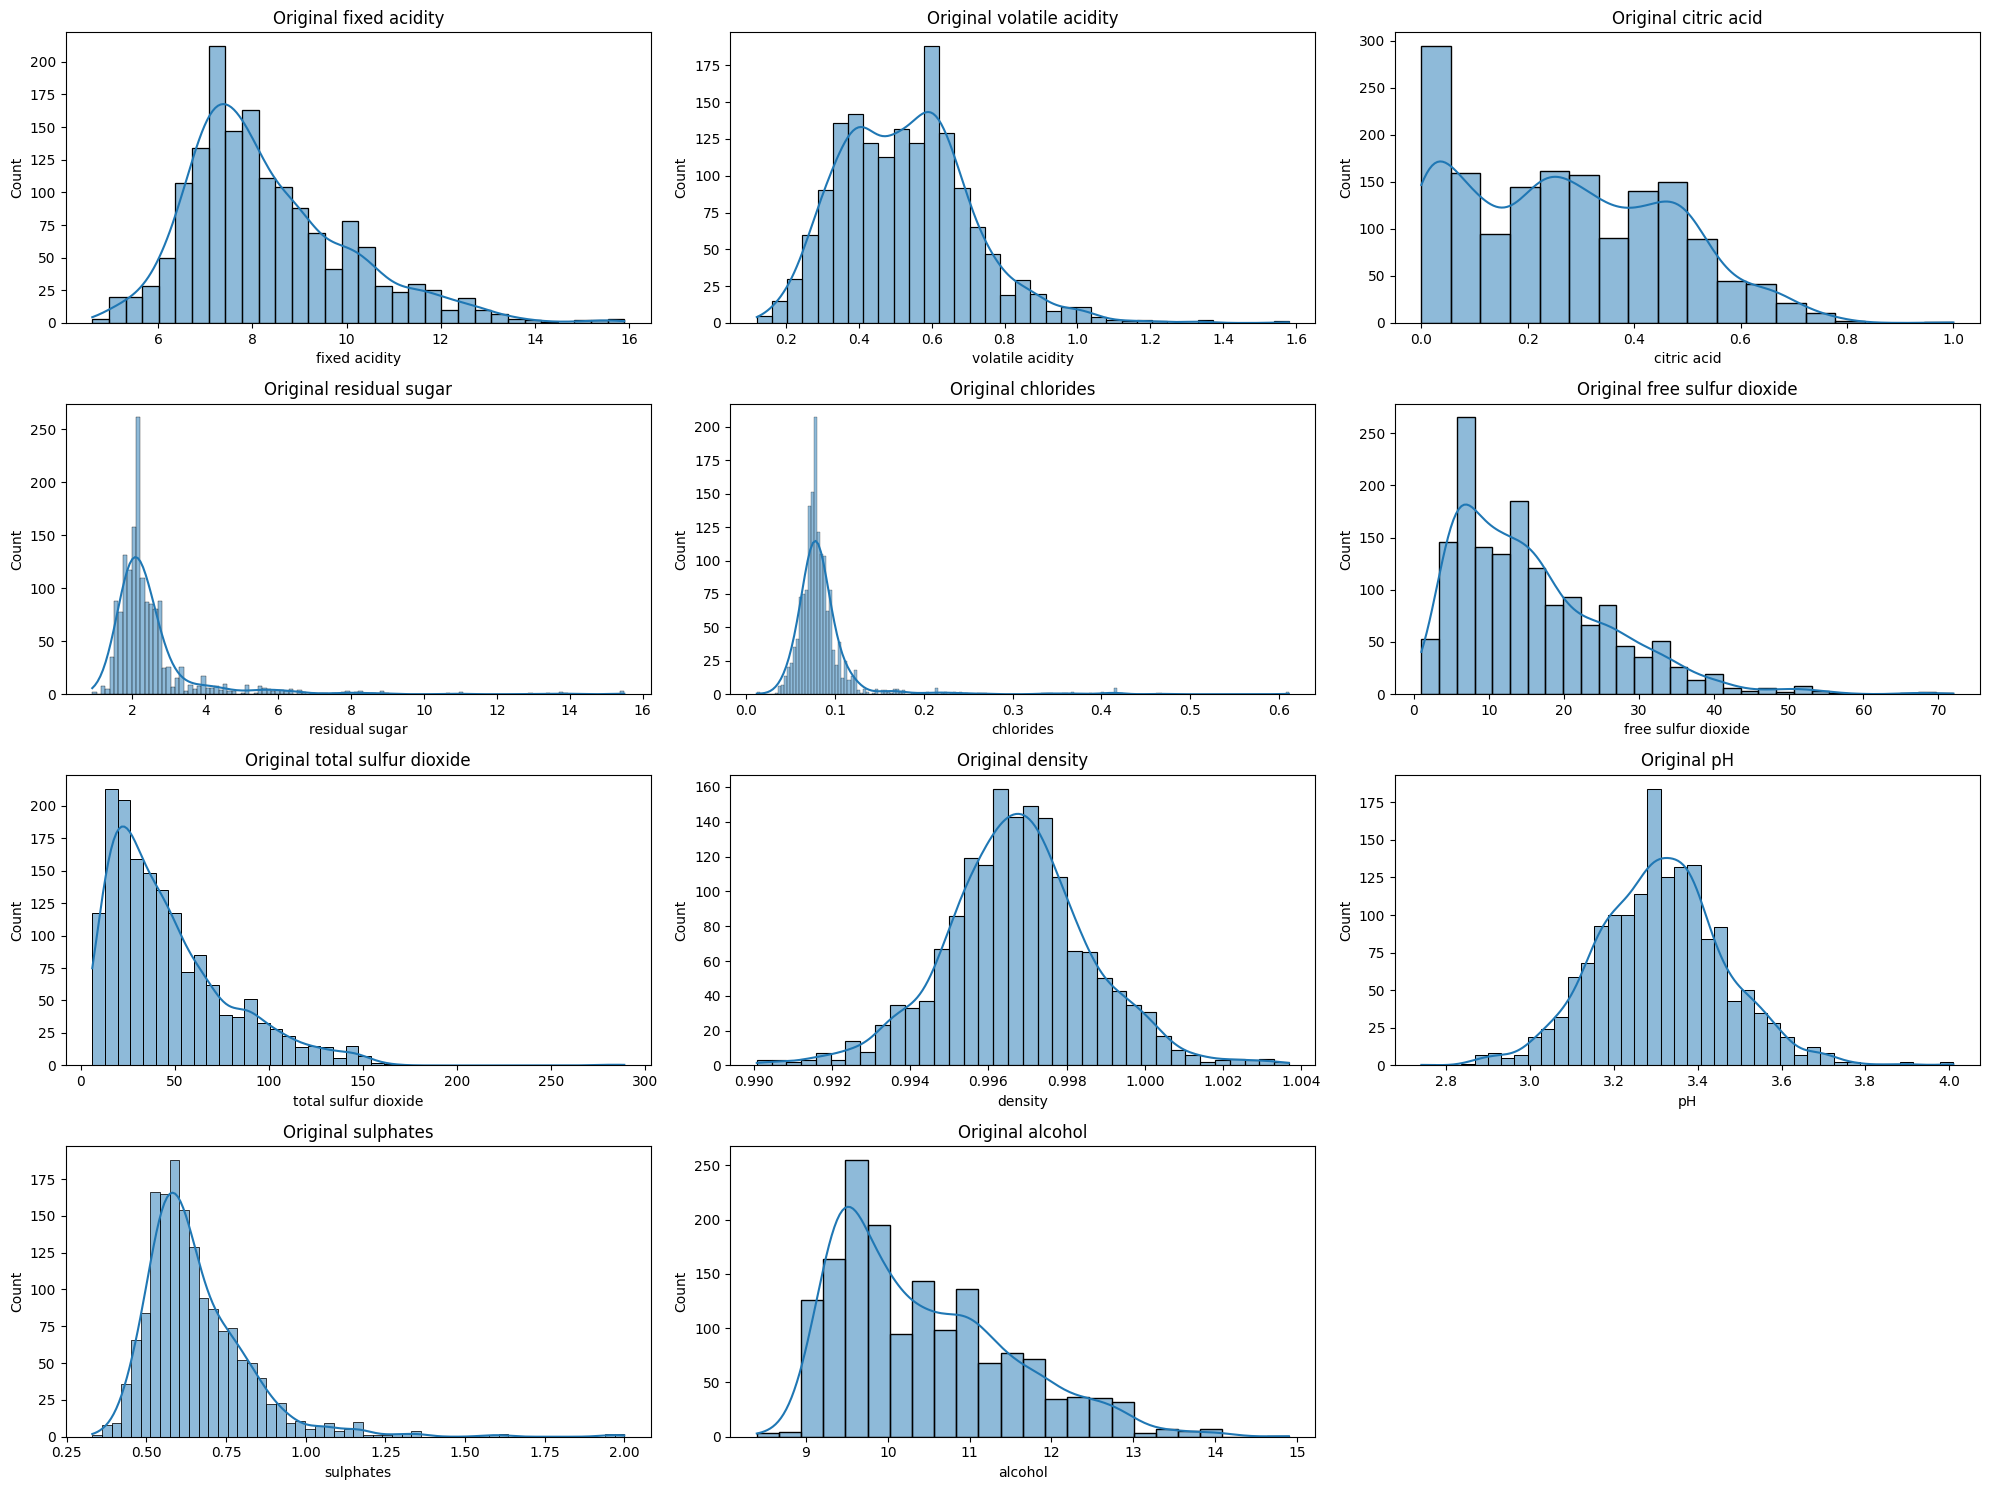

In [19]:
# Analyzing the distribution of features before scaling by histograms
plt.figure(figsize=(20, 15))
for i, column in enumerate(features.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(wine_dataset[column], kde=True)
    plt.title(f'Original {column}')

plt.tight_layout()
plt.show()

In [9]:
# Separating features and target variable before featur scaling
features = wine_dataset.drop('quality', axis=1)
target = wine_dataset['quality']

<h2><li>Normalization (MinMax Scaling)</li></h2>
<p>Normalization is the process of making the range of feature values from 0 to 1. Range = [0, 1]</p>

In [10]:
# Applying Min Max scaling
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Converting the normalized features into DataFrame
features_normalized = pd.DataFrame(features_normalized, columns=features.columns)
features_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [29]:
# Basic statistics of normalized features
features_normalized.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,0.329,0.279,0.271,0.112,0.126,0.210,0.143,0.490,0.450,0.196,0.311
std,0.154,0.123,0.195,0.097,0.079,0.147,0.116,0.139,0.122,0.102,0.164
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.221,0.185,0.090,0.068,0.097,0.085,0.057,0.406,0.370,0.132,0.169
50%,0.292,0.274,0.260,0.089,0.112,0.183,0.113,0.490,0.449,0.174,0.277
75%,0.407,0.356,0.420,0.116,0.130,0.282,0.198,0.570,0.520,0.240,0.415
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


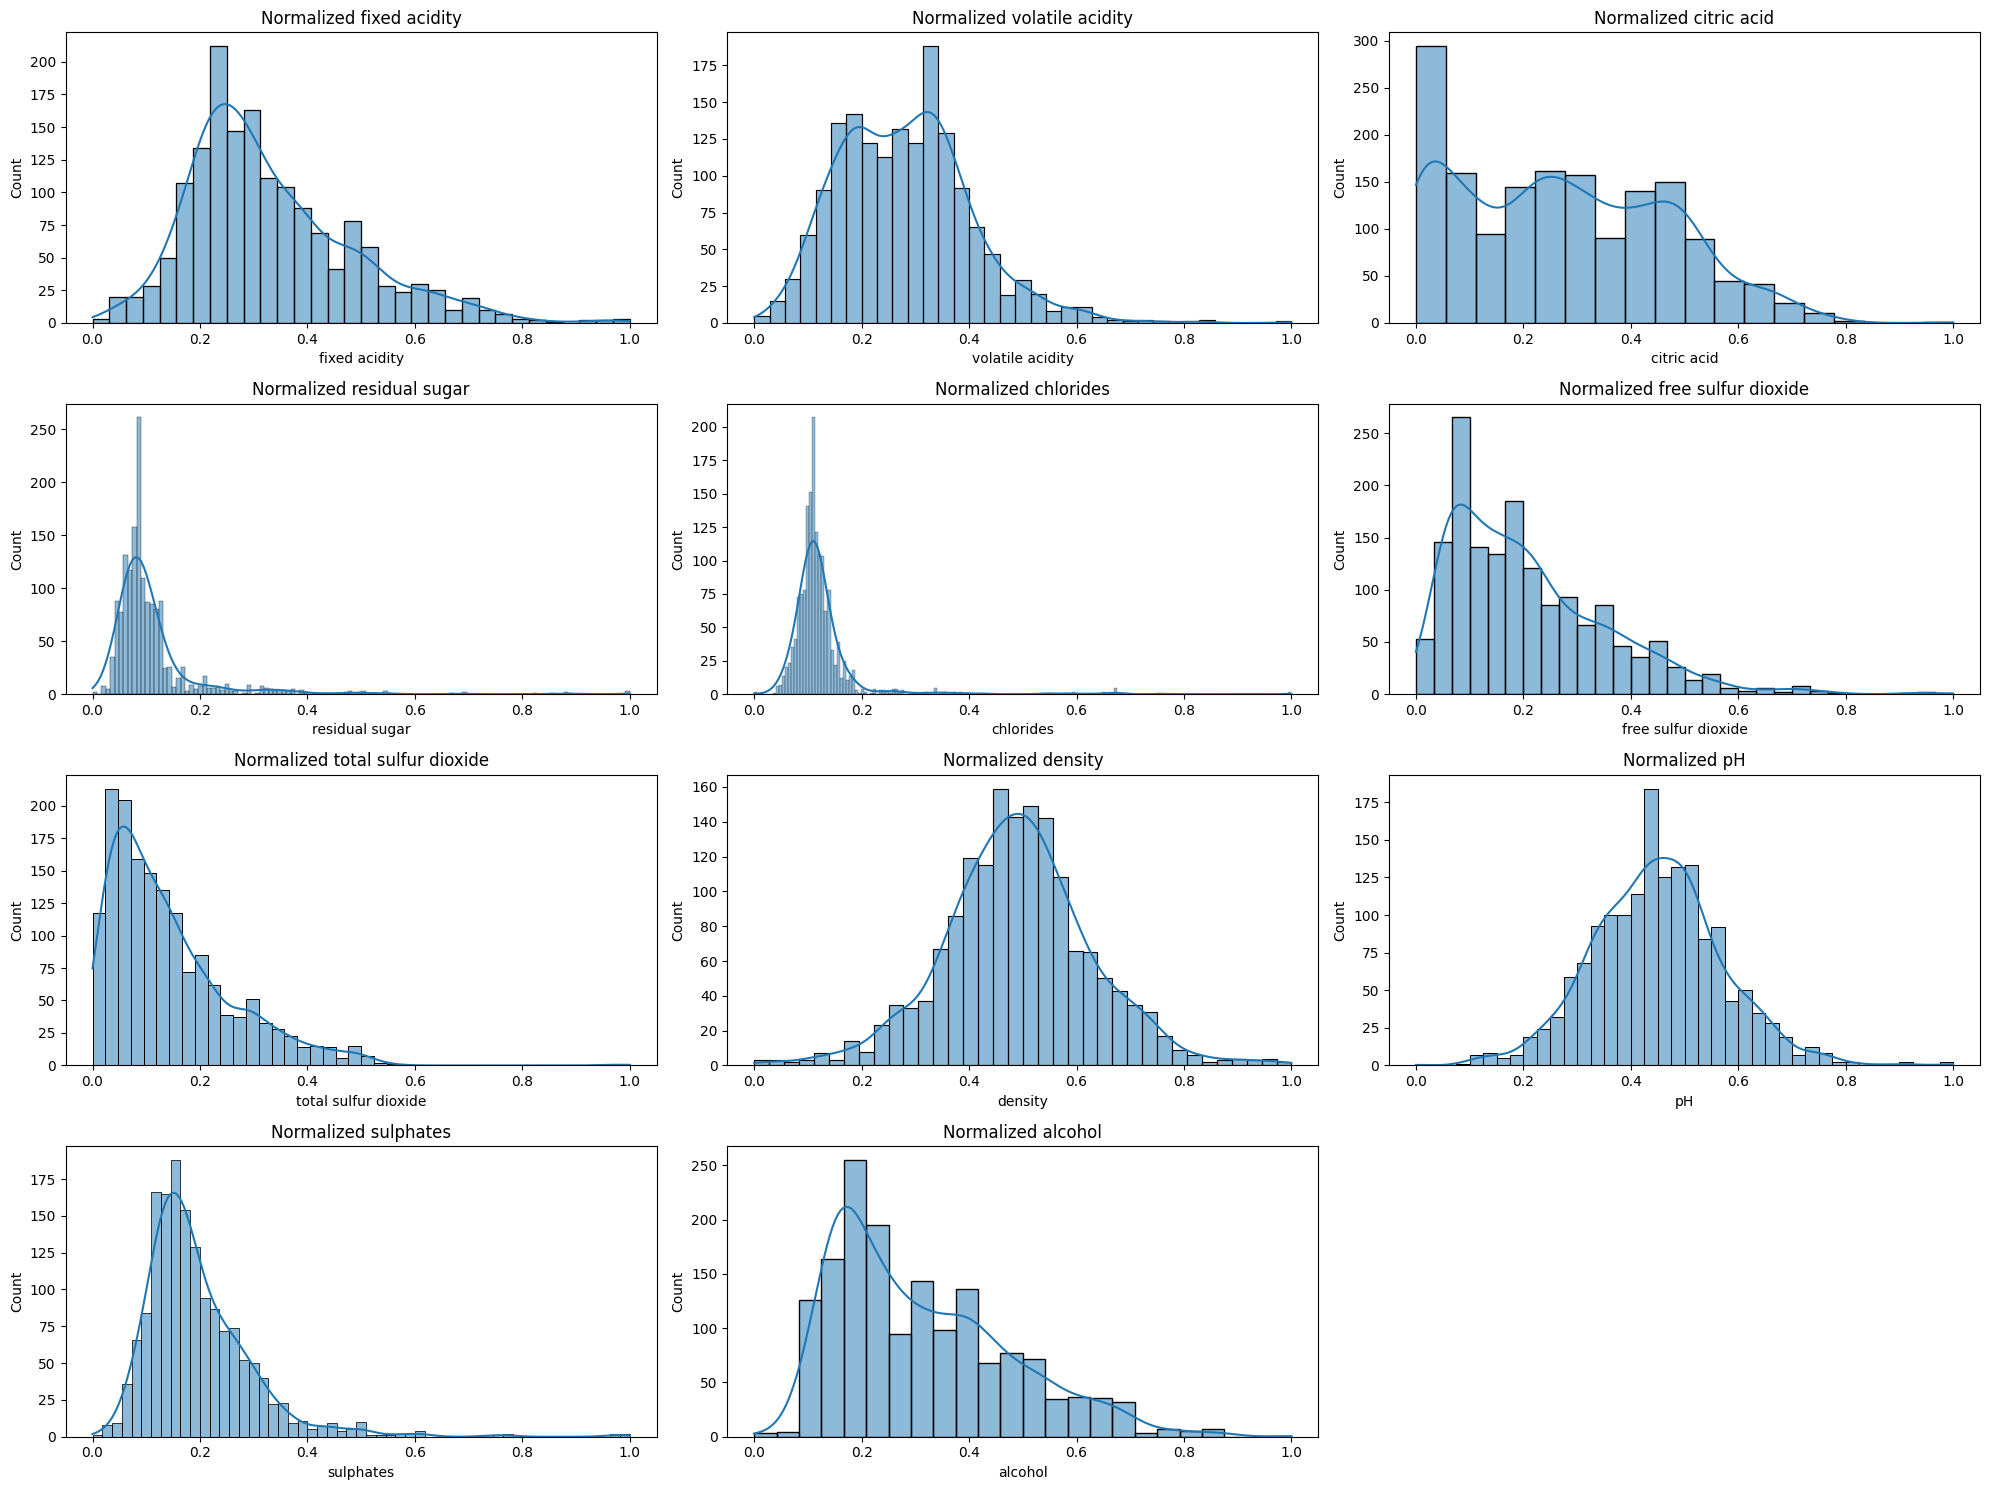

In [21]:
# Plot histograms of normalized features
plt.figure(figsize=(15, 10))
for i, column in enumerate(features_normalized.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(features_normalized[column], kde=True)
    plt.title(f'Normalized {column}')

plt.tight_layout()
plt.show()

-> So we can see that the range of feature values have been changed to [0, 1].

<h2><li>Standardization (Z-scores Scaling)</li></h2>
<p>Standardization is conducted to transform the data to have mean of 0 and standard deviation of 1.<br> Standardization is also known as Z-scores normalization.</p>

In [23]:
# Applying Standard scaling
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Converting the standardized features into DataFrame
features_standardized = pd.DataFrame(features_standardized, columns=features.columns)
features_standardized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [28]:
# Basic statistics of standardized features
features_standardized.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.137,-2.278,-1.391,-1.163,-1.604,-1.423,-1.231,-3.539,-3.700,-1.937,-1.899
25%,-0.701,-0.770,-0.929,-0.453,-0.371,-0.849,-0.744,-0.608,-0.655,-0.638,-0.866
50%,-0.241,-0.044,-0.056,-0.240,-0.180,-0.179,-0.257,0.002,-0.007,-0.225,-0.209
75%,0.506,0.627,0.765,0.043,0.054,0.490,0.472,0.577,0.576,0.424,0.635
max,4.355,5.878,3.744,9.196,11.127,5.367,7.375,3.680,4.528,7.919,4.202


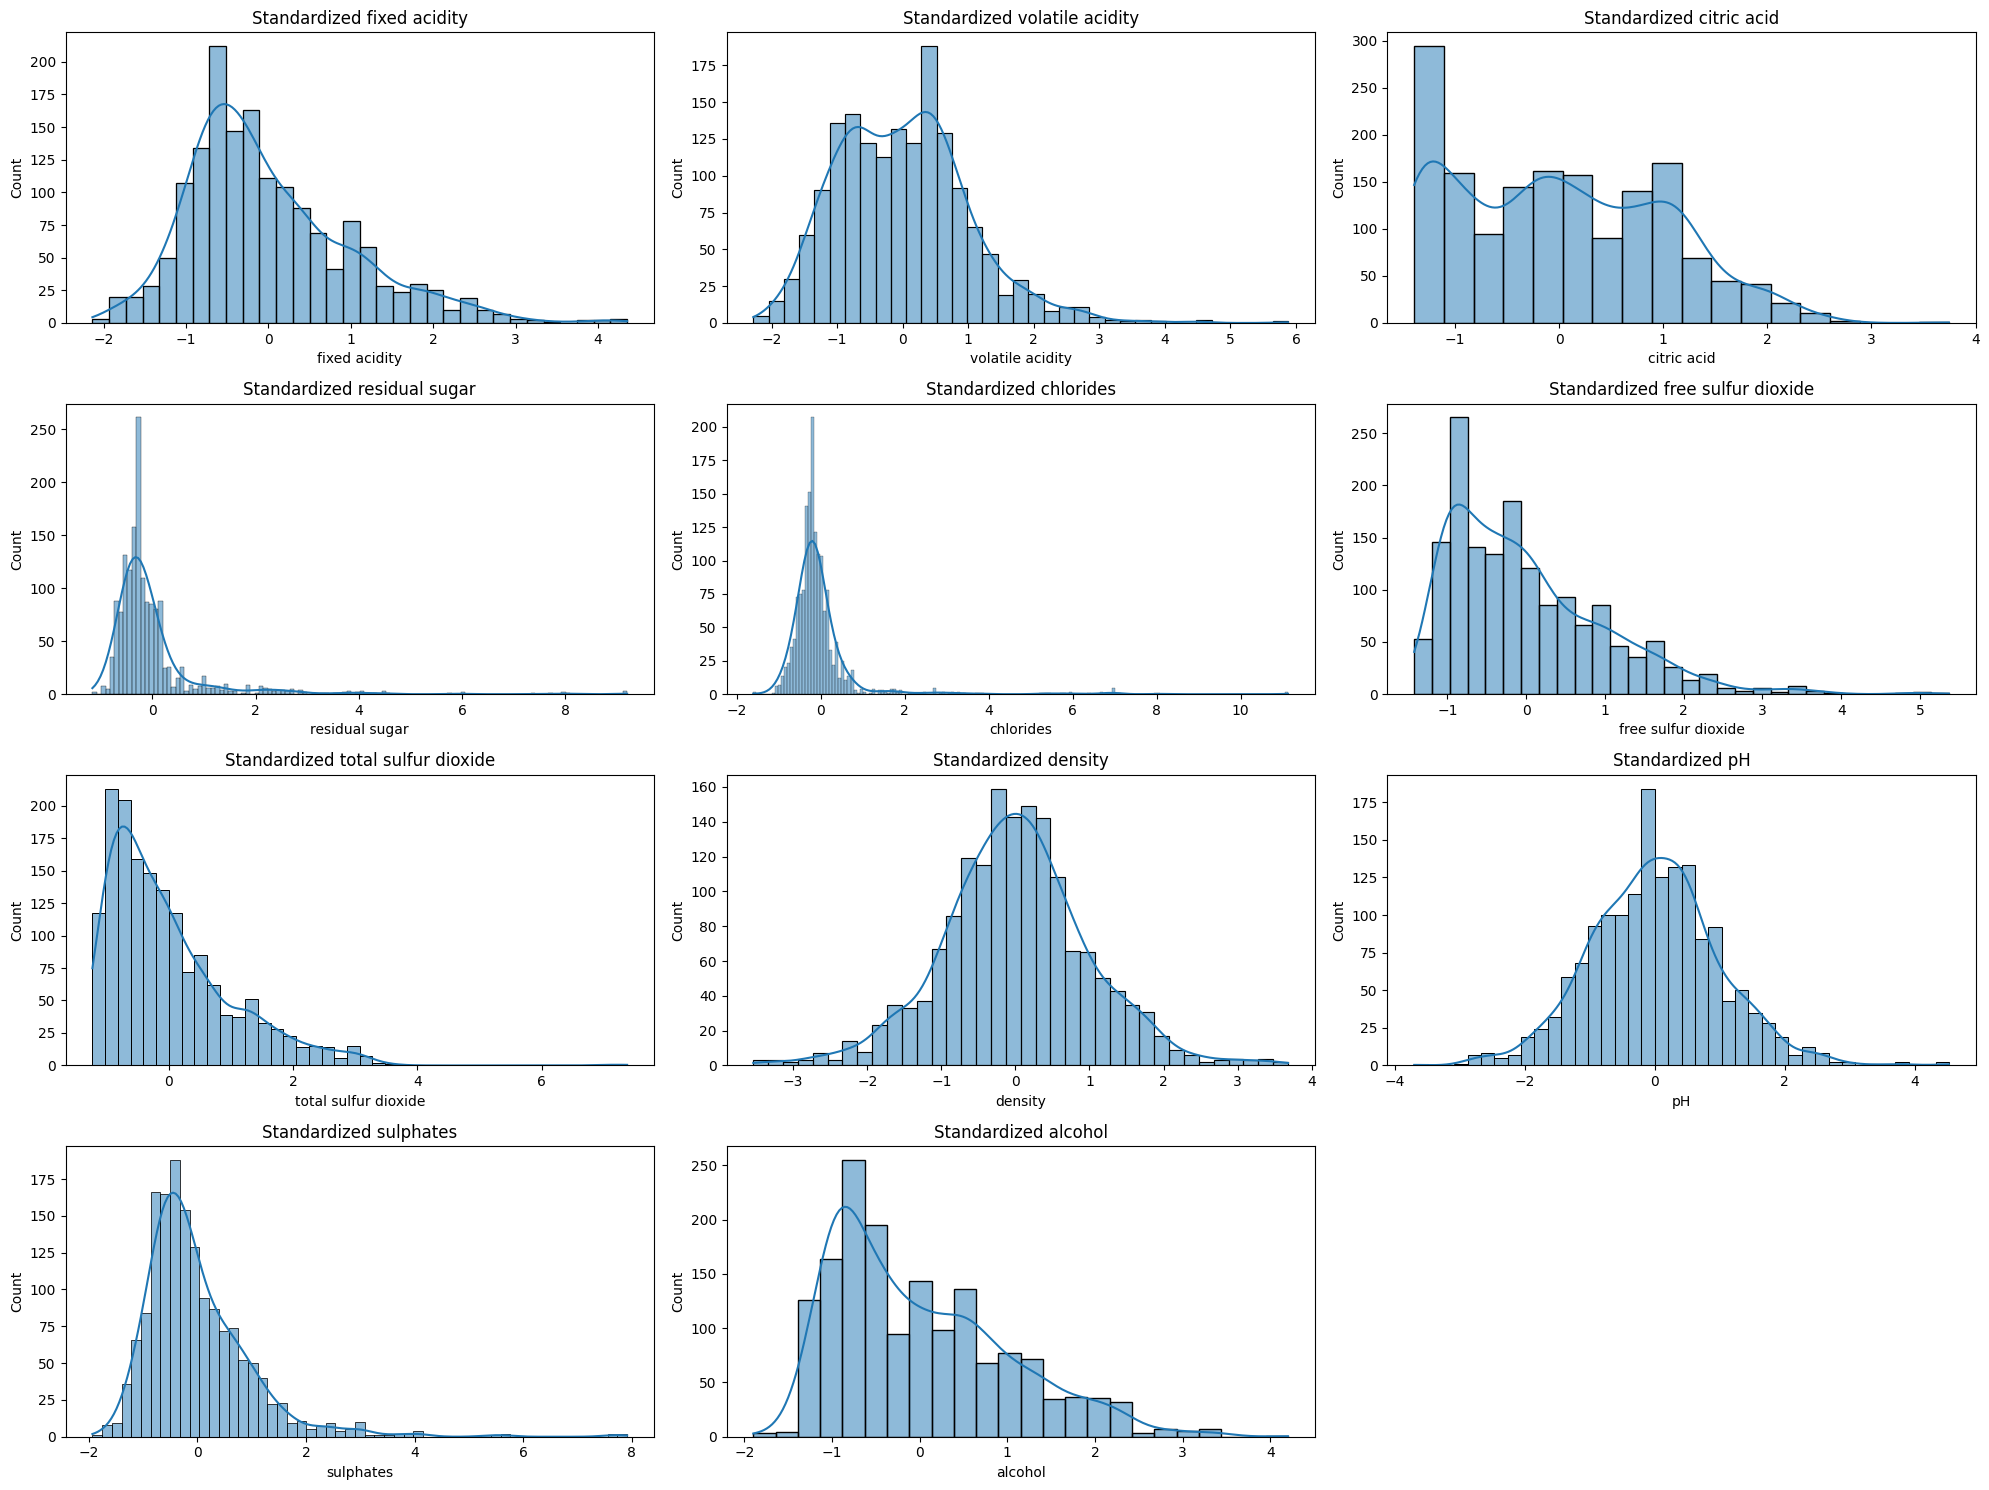

In [25]:
# Plot histograms of standardized features
plt.figure(figsize=(20, 15))
for i, column in enumerate(features_standardized.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(features_standardized[column], kde=True)
    plt.title(f'Standardized {column}')

plt.tight_layout()
plt.show()

-> So we can see that the mean is changed to 0 and standard deviation to 1.

<h2>Analyzing Data Distribution</h2>
<pre>       From above statistics and histogram plots</pre>

<h4><li>Original Data</li></h4>
<p>In the <b>original data</b>, the features are distributed along the range they are originally defined. They all have different means, standard deviation and ranges.</p>


<h4><li>Normalized Data</li></h4>
<p>In the <b>normalized data</b>, all the features are distributed along the range of [0, 1]. They all have same ranges, but different values of mean and standard deviation.</p>

<h4><li>Standardized Data</li></h4>
<p>In the <b>standardized data</b>, all the features are distributed along the mean equal to 0.  They don't have defined ranges (different range for each feature) but they all have same range (0) and same standard deviation (1).</p>